In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("../data/raw_data.csv")

In [3]:
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
selected_features=["App Usage Time (min/day)","Screen On Time (hours/day)","Battery Drain (mAh/day)","Number of Apps Installed","Data Usage (MB/day)", "Age"]
df_selected=data[selected_features]
df_selected.describe()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857
std,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000
25%,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000
50%,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000
75%,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000
max,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000


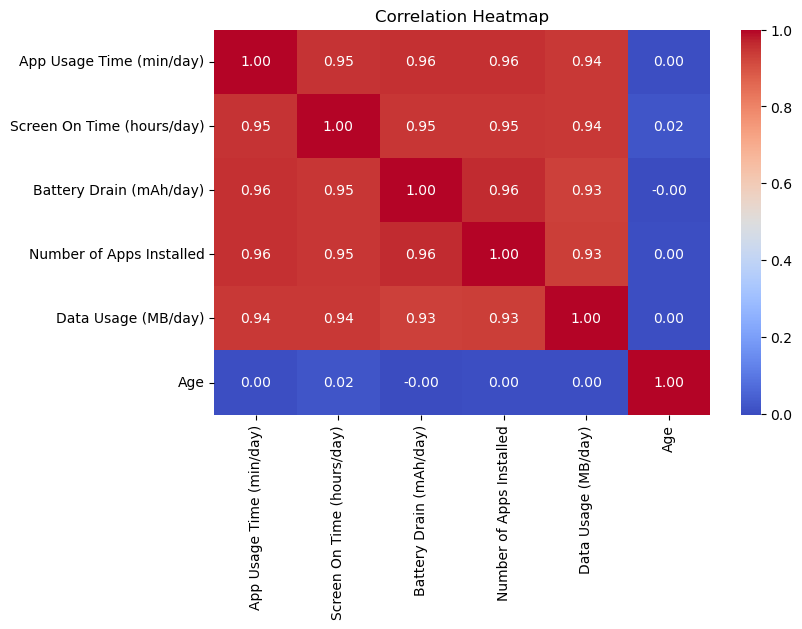

In [5]:
#Corelation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df_selected.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("../visualizations/correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()


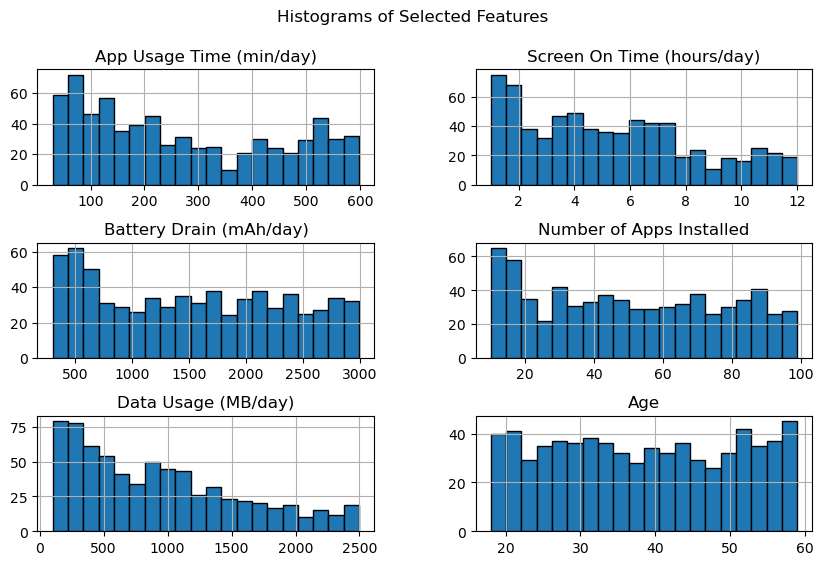

In [6]:
# Histograms for selected features
df_selected.hist(figsize=(10, 6), bins=20, edgecolor="black")
plt.suptitle("Histograms of Selected Features")
plt.subplots_adjust(hspace=0.5)
plt.show()

In [23]:
data.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

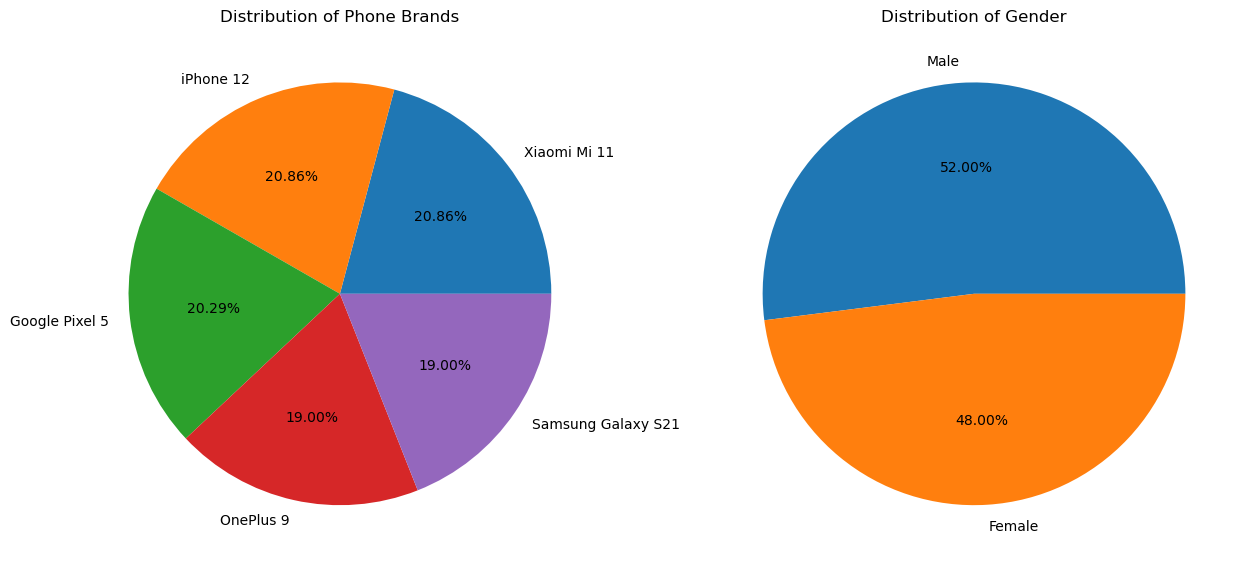

In [ ]:
df1=data['Device Model'].value_counts().reset_index()
df3=data['Gender'].value_counts().reset_index()
fig,ax=plt.subplots(1,2,figsize=(15,8))
ax[0].pie(x=df1['count'],labels=df1['Device Model'],autopct='%.2f%%')
ax[0].set_title("Distribution of Phone Brands")

ax[1].pie(x=df3['count'],labels=df3['Gender'],autopct='%.2f%%')
ax[1].set_title("Distribution of Gender")
plt.show()

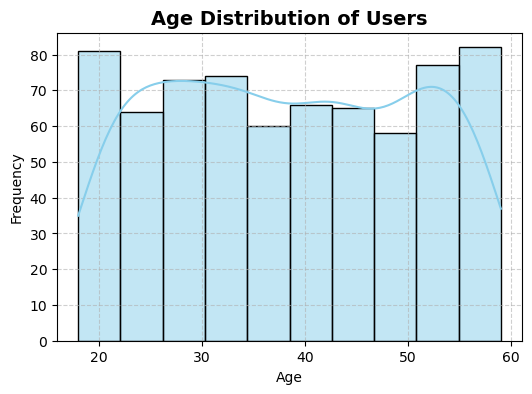

In [28]:
plt.figure(figsize=(6, 4))
sns.histplot(data['Age'], kde=True, bins=10, color='skyblue')
plt.title("Age Distribution of Users", fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


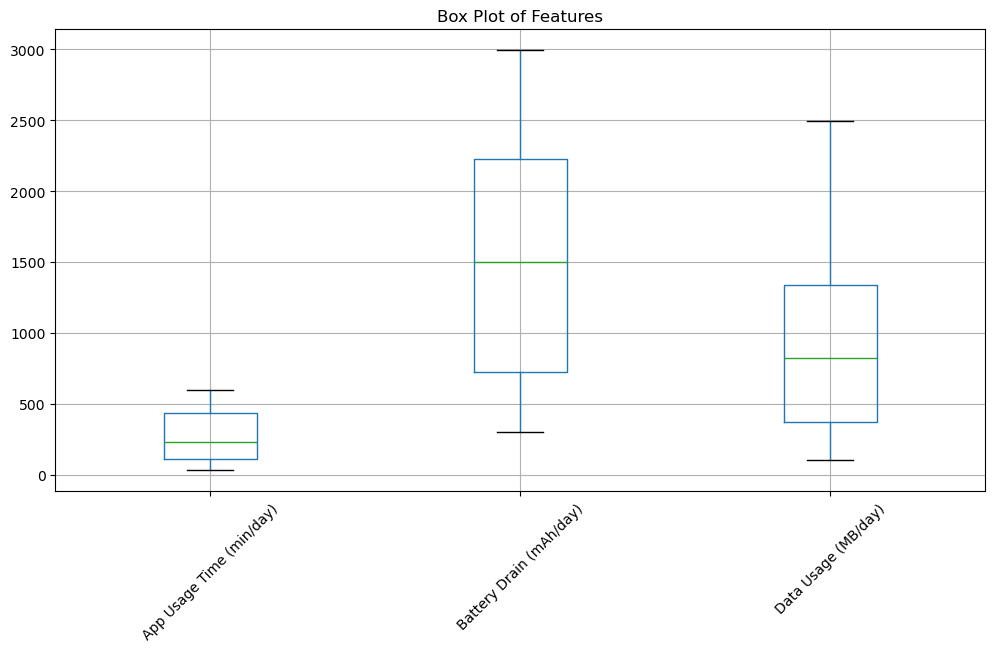

In [11]:
# Box plots to visualize outliers
selected_features=["App Usage Time (min/day)","Battery Drain (mAh/day)","Data Usage (MB/day)"]
df_selected=data[selected_features]
plt.figure(figsize=(12, 6))
df_selected.boxplot(rot=45)
plt.title("Box Plot of Features")
plt.show()

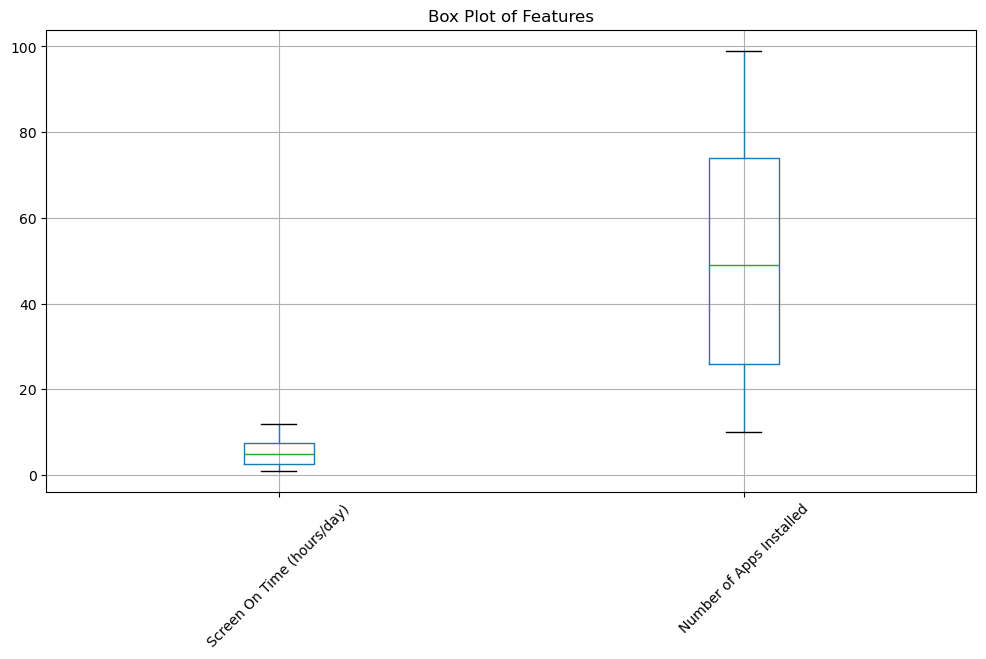

In [12]:
selected_features=["Screen On Time (hours/day)","Number of Apps Installed"]
df_selected=data[selected_features]
plt.figure(figsize=(12, 6))
df_selected.boxplot(rot=45)
plt.title("Box Plot of Features")
plt.show()

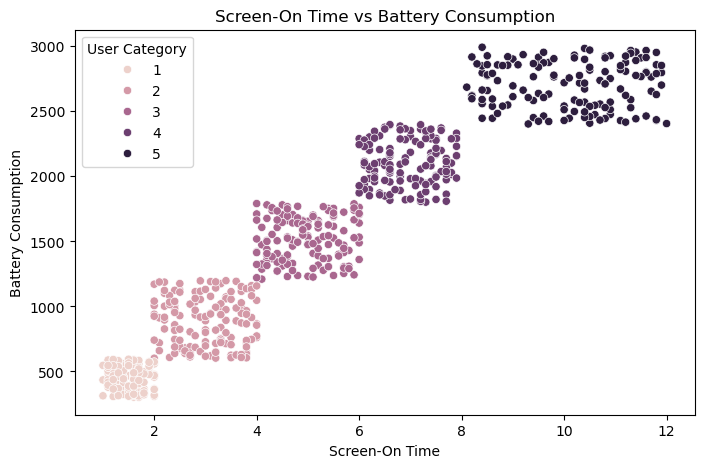

In [48]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data["Screen On Time (hours/day)"], y=data["Battery Drain (mAh/day)"], hue=data["User Behavior Class"])
plt.title("Screen-On Time vs Battery Consumption")
plt.xlabel("Screen-On Time")
plt.ylabel("Battery Consumption")
plt.legend(title="User Category")
plt.show()